# Response of Cayenne Pepper to Different Water Regimes in Abeokuta

## Soil Temperature Analysis

by Udechukwu Jerry Chinedu

Cayene pepper plant thrive in warm soil temperatures between 21-27 degree celsius. The soil temperature at 5cm and 10cm dept per treatment was taken weekly. The csv file "Soil_temperature" contains the weekly soil temperature per treatment "TRT".

Keys:
* `5cm`- soil temperature at 5cm depth
* `10cm`- soil temperature at 10cm depth 
* `TRT`- treatments
* `FLD`- flooding (wetting everyday)
* `2DW`- wetting every 2days
* `4DW`- wetting every 4days
* `6DW`- wetting every 6days
* `WAT`- weeks after transplant

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Soil_temperature.csv")
df.head()

,TRT,Replica,5cm1WAT,10cm1WAT,5cm2WAT,10cm2WAT,5cm3WAT,10cm3WAT,5cm4WAT,10cm4WAT,...,5cm6WAT,10cm6WAT,5cm7WAT,10cm7WAT,5cm8WAT,10cm8WAT,5cm9WAT,10cm9WAT,5cm10WAT,10cm10WAT
0,FLD,1,32.5,31.6,31.1,30.6,31.1,30.6,24.6,24.8,...,34.6,35.6,27.1,27.1,26.6,26.5,24.4,24.7,28.2,28.2
1,2DW,1,32.9,32.1,31.5,30.9,34.0,34.1,24.6,24.9,...,34.9,35.3,27.8,27.9,28.6,28.2,24.6,25.0,29.0,28.5
2,4DW,1,32.5,32.8,32.5,31.8,34.9,35.6,24.8,24.8,...,34.8,35.6,28.8,28.3,27.9,27.6,24.2,24.4,28.7,28.6
3,6DW,1,32.8,32.4,32.4,32.6,34.4,35.1,24.6,24.8,...,34.6,35.3,28.9,28.1,27.6,27.5,24.1,24.2,28.9,28.8
4,2DW,2,32.5,31.6,31.5,31.3,34.1,34.6,24.5,24.8,...,34.1,34.6,27.8,28.0,26.8,26.8,25.0,25.2,28.9,28.7


In [3]:
df.isnull().sum()

TRT          0
Replica      0
5cm1WAT      0
10cm1WAT     0
5cm2WAT      0
10cm2WAT     0
5cm3WAT      0
10cm3WAT     0
5cm4WAT      0
10cm4WAT     0
5cm5WAT      0
10cm5WAT     0
5cm6WAT      0
10cm6WAT     0
5cm7WAT      0
10cm7WAT     0
5cm8WAT      0
10cm8WAT     0
5cm9WAT      0
10cm9WAT     0
5cm10WAT     0
10cm10WAT    0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(12, 22)

## Soil Temperature at 5cm

In [6]:
# Filter and subset all weekly data on Plant Height "5cm"

col_5cm =[col for col in df.columns if col.startswith("5cm")]
temp_5cm = df[["TRT"] + col_5cm]
temp_5cm.head()

,TRT,5cm1WAT,5cm2WAT,5cm3WAT,5cm4WAT,5cm5WAT,5cm6WAT,5cm7WAT,5cm8WAT,5cm9WAT,5cm10WAT
0,FLD,32.5,31.1,31.1,24.6,31.1,34.6,27.1,26.6,24.4,28.2
1,2DW,32.9,31.5,34.0,24.6,34.0,34.9,27.8,28.6,24.6,29.0
2,4DW,32.5,32.5,34.9,24.8,34.9,34.8,28.8,27.9,24.2,28.7
3,6DW,32.8,32.4,34.4,24.6,34.4,34.6,28.9,27.6,24.1,28.9
4,2DW,32.5,31.5,34.1,24.5,35.1,34.1,27.8,26.8,25.0,28.9


In [7]:
temp_5cm.shape

(12, 11)

In [8]:
temp_5cm.describe()

,5cm1WAT,5cm2WAT,5cm3WAT,5cm4WAT,5cm5WAT,5cm6WAT,5cm7WAT,5cm8WAT,5cm9WAT,5cm10WAT
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,32.600000,31.933333,33.625000,24.741667,34.500000,34.516667,27.775000,27.283333,24.600000,28.633333
std,0.359292,0.681353,1.558627,0.210878,1.590312,0.845129,0.565886,0.675323,0.310425,0.467748
min,31.900000,30.800000,31.100000,24.500000,31.100000,33.600000,27.100000,26.500000,24.100000,27.600000
25%,32.500000,31.450000,32.550000,24.600000,34.000000,34.075000,27.375000,26.775000,24.400000,28.475000
50%,32.550000,32.100000,34.000000,24.600000,34.850000,34.300000,27.750000,27.100000,24.550000,28.650000
75%,32.825000,32.500000,34.325000,24.900000,35.200000,34.650000,27.825000,27.675000,24.825000,28.900000
max,33.100000,32.900000,36.900000,25.100000,37.300000,36.900000,28.900000,28.600000,25.100000,29.500000


In [9]:
# Calculate the average soil temperature per treatment at 5cm depth

avg_5cm= temp_5cm.groupby("TRT").mean().round(2)
avg_5cm

,5cm1WAT,5cm2WAT,5cm3WAT,5cm4WAT,5cm5WAT,5cm6WAT,5cm7WAT,5cm8WAT,5cm9WAT,5cm10WAT
TRT,,,,,,,,,,
2DW,32.50,31.27,33.40,24.67,34.90,34.43,27.80,27.40,24.80,28.90
4DW,32.73,32.47,34.97,24.83,35.13,35.33,28.03,27.37,24.73,28.53
6DW,32.87,32.60,33.80,24.87,34.67,34.17,28.07,27.77,24.37,29.00
FLD,32.30,31.40,32.33,24.60,33.30,34.13,27.20,26.60,24.50,28.10


In [10]:
transposed_5cm=avg_5cm.T
transposed_5cm

TRT,2DW,4DW,6DW,FLD
5cm1WAT,32.50,32.73,32.87,32.30
5cm2WAT,31.27,32.47,32.60,31.40
5cm3WAT,33.40,34.97,33.80,32.33
5cm4WAT,24.67,24.83,24.87,24.60
5cm5WAT,34.90,35.13,34.67,33.30
5cm6WAT,34.43,35.33,34.17,34.13
5cm7WAT,27.80,28.03,28.07,27.20
5cm8WAT,27.40,27.37,27.77,26.60
5cm9WAT,24.80,24.73,24.37,24.50
5cm10WAT,28.90,28.53,29.00,28.10


Text(0.5, 0, 'Weeks After Transplant')

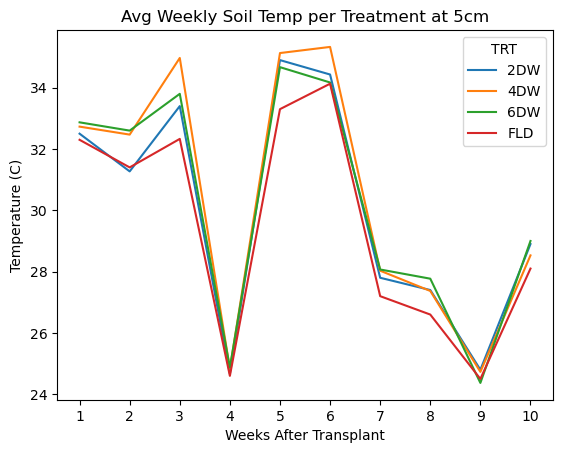

In [11]:
# Create a line chart of the average soil temperature at 5cm

transposed_5cm.plot(kind="line")
plt.title("Avg Weekly Soil Temp per Treatment at 5cm")
plt.ylabel("Temperature (C)")

# set the x_axis category labels
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel("Weeks After Transplant")

Keys:
* 5cm- soil temperature at 5cm depth
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days

# Soil Temperature at 10cm

In [12]:
# Filter and subset all weekly data on "10cm"

col_10cm =[col for col in df.columns if col.startswith("10cm")]
temp_10cm = df[["TRT"] + col_10cm]
temp_10cm.head()

,TRT,10cm1WAT,10cm2WAT,10cm3WAT,10cm4WAT,10cm5WAT,10cm6WAT,10cm7WAT,10cm8WAT,10cm9WAT,10cm10WAT
0,FLD,31.6,30.6,30.6,24.8,30.6,35.6,27.1,26.5,24.7,28.2
1,2DW,32.1,30.9,34.1,24.9,34.1,35.3,27.9,28.2,25.0,28.5
2,4DW,32.8,31.8,35.6,24.8,35.6,35.6,28.3,27.6,24.4,28.6
3,6DW,32.4,32.6,35.1,24.8,35.1,35.3,28.1,27.5,24.2,28.8
4,2DW,31.6,31.3,34.6,24.8,34.3,34.6,28.0,26.8,25.2,28.7


In [13]:
temp_10cm.shape

(12, 11)

In [14]:
temp_10cm.describe()

,10cm1WAT,10cm2WAT,10cm3WAT,10cm4WAT,10cm5WAT,10cm6WAT,10cm7WAT,10cm8WAT,10cm9WAT,10cm10WAT
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,32.083333,31.783333,33.716667,24.841667,34.441667,35.150000,27.658333,27.191667,24.833333,28.516667
std,0.683352,0.940825,2.077951,0.162135,1.718593,0.833939,0.418783,0.568024,0.308466,0.361395
min,30.900000,30.600000,30.600000,24.600000,30.600000,34.100000,27.000000,26.500000,24.200000,27.600000
25%,31.600000,31.050000,32.150000,24.800000,34.075000,34.750000,27.300000,26.775000,24.700000,28.450000
50%,32.200000,31.700000,34.350000,24.800000,34.700000,34.850000,27.750000,27.100000,24.900000,28.600000
75%,32.450000,32.425000,34.950000,24.925000,35.375000,35.375000,27.925000,27.600000,25.025000,28.725000
max,33.300000,33.900000,37.400000,25.100000,37.100000,37.400000,28.300000,28.200000,25.200000,29.000000


In [15]:
# calculate the average soil temperature per treatments at 10cm depth

avg_10cm= temp_10cm.groupby("TRT").mean().round(2)
avg_5cm

,5cm1WAT,5cm2WAT,5cm3WAT,5cm4WAT,5cm5WAT,5cm6WAT,5cm7WAT,5cm8WAT,5cm9WAT,5cm10WAT
TRT,,,,,,,,,,
2DW,32.50,31.27,33.40,24.67,34.90,34.43,27.80,27.40,24.80,28.90
4DW,32.73,32.47,34.97,24.83,35.13,35.33,28.03,27.37,24.73,28.53
6DW,32.87,32.60,33.80,24.87,34.67,34.17,28.07,27.77,24.37,29.00
FLD,32.30,31.40,32.33,24.60,33.30,34.13,27.20,26.60,24.50,28.10


In [16]:
transposed_10cm=avg_10cm.T
transposed_10cm

TRT,2DW,4DW,6DW,FLD
10cm1WAT,31.80,32.50,32.77,31.27
10cm2WAT,31.33,32.43,32.50,30.87
10cm3WAT,33.47,35.10,34.20,32.10
10cm4WAT,24.93,24.90,24.80,24.73
10cm5WAT,34.73,35.33,34.77,32.93
10cm6WAT,34.90,35.93,34.77,35.00
10cm7WAT,27.93,27.83,27.57,27.30
10cm8WAT,27.27,27.27,27.67,26.57
10cm9WAT,25.03,24.83,24.63,24.83
10cm10WAT,28.67,28.50,28.80,28.10


Text(0.5, 0, 'Weeks After Transplant')

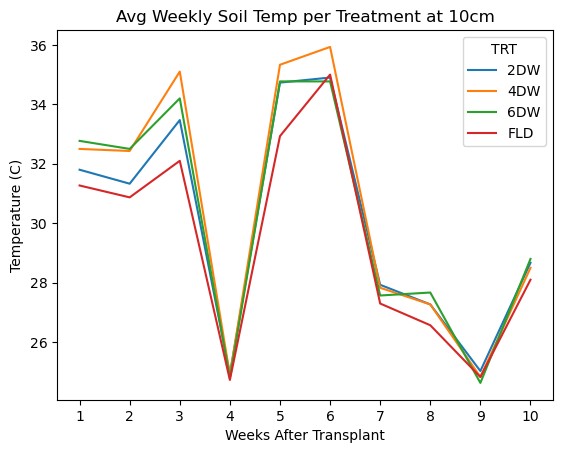

In [17]:
# Create a line chart of the average soil temperature at 10cm

transposed_10cm.plot(kind="line")
plt.title("Avg Weekly Soil Temp per Treatment at 10cm")
plt.ylabel("Temperature (C)")

# set the x_axis category labels
x_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel("Weeks After Transplant")

Keys:
* 10cm- soil temperature at 10cm depth
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days

Summary
---

Overall, it can be observed that the soil temperature pattern at `5cm` and `10cm` depth are similar. The soil temperature all throuh the study fell in the range of the required soil temperature for optimal growth of Cayenne pepper.